In [3]:
%matplotlib inline

1. Predict with pre-trained Mask RCNN models
===============================================

This article shows how to play with pre-trained Mask RCNN model.

Mask RCNN networks are extensions to Faster RCNN networks.
:py:class:`gluoncv.model_zoo.MaskRCNN` is inherited from
:py:class:`gluoncv.model_zoo.FasterRCNN`.
It is highly recommended to read :doc:`../examples_detection/demo_faster_rcnn` first.

First let's import some necessary libraries:


In [1]:
from matplotlib import pyplot as plt
from gluoncv import model_zoo, data, utils
import mxnet as mx


C:\Users\Administrator\anaconda3\envs\py39_mxnet_gpu\lib\site-packages\gluoncv\__init__.py:40: UserWarning: Both `mxnet==1.5.0` and `torch==1.8.1+cpu` are installed. You might encounter increased GPU memory footprint if both framework are used at the same time.
  warnings.warn(f'Both `mxnet=={mx.__version__}` and `torch=={torch.__version__}` are installed. '


Load a pretrained model
-------------------------

Let's get an Mask RCNN model trained on COCO dataset with ResNet-50 backbone.
By specifying ``pretrained=True``, it will automatically download the model
from the model zoo if necessary. For more pretrained models, please refer to
:doc:`../../model_zoo/index`.

The returned model is a HybridBlock :py:class:`gluoncv.model_zoo.MaskRCNN`
with a default context of `cpu(0)`.



In [2]:
# using GPU
ctx = mx.gpu(0)
net = model_zoo.get_model('mask_rcnn_resnet50_v1b_coco', pretrained=True,ctx = mx.gpu(0))

print(type(ctx))

<class 'mxnet.context.Context'>


Pre-process an image
--------------------

The pre-processing step is identical to Faster RCNN.

Next we download an image, and pre-process with preset data transforms.
The default behavior is to resize the short edge of the image to 600px.
But you can feed an arbitrarily sized image.

You can provide a list of image file names, such as ``[im_fname1, im_fname2,
...]`` to :py:func:`gluoncv.data.transforms.presets.rcnn.load_test` if you
want to load multiple image together.

This function returns two results. The first is a NDArray with shape
`(batch_size, RGB_channels, height, width)`. It can be fed into the
model directly. The second one contains the images in numpy format to
easy to be plotted. Since we only loaded a single image, the first dimension
of `x` is 1.

Please beware that `orig_img` is resized to short edge 600px.



# for one picture

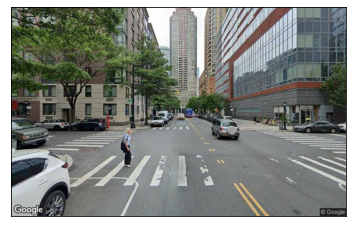

In [4]:
from mxnet import image
from mxnet.gluon.data.vision import transforms
import gluoncv


# Image path
path = '../image_SVI_buffer/'
file_name = '1.jpg'

x, orig_img = data.transforms.presets.rcnn.load_test(path+file_name)
plt.xticks([])
plt.yticks([])
plt.imshow(orig_img)
plt.show()


Inference and display
---------------------

The Mask RCNN model returns predicted class IDs, confidence scores,
bounding boxes coordinates and segmentation masks.
Their shape are (batch_size, num_bboxes, 1), (batch_size, num_bboxes, 1)
(batch_size, num_bboxes, 4), and (batch_size, num_bboxes, mask_size, mask_size)
respectively. For the model used in this tutorial, mask_size is 14.

Object Detection results

We can use :py:func:`gluoncv.utils.viz.plot_bbox` to visualize the
results. We slice the results for the first image and feed them into `plot_bbox`:

Plot Segmentation

:py:func:`gluoncv.utils.viz.expand_mask` will resize the segmentation mask
and fill the bounding box size in the original image.
:py:func:`gluoncv.utils.viz.plot_mask` will modify an image to
overlay segmentation masks.



In [5]:
# *************Start Timer***
from datetime import datetime
startTime = datetime.now() # initiate timer

# Get MaskRcnn Results

ids, scores, bboxes, masks = [xx[0].asnumpy() for xx in net(x.as_in_context(mx.gpu(0)))]


runtime: 0:00:34.324891


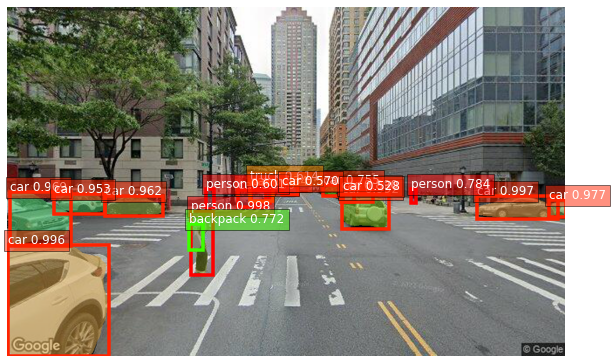

In [6]:

# paint segmentation mask on images directly
width, height = orig_img.shape[1], orig_img.shape[0]
masks, _ = utils.viz.expand_mask(masks, bboxes, (width, height), scores)
orig_img = utils.viz.plot_mask(orig_img, masks)

# identical to Faster RCNN object detection
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)
ax = utils.viz.plot_bbox(orig_img, bboxes, scores, ids,
                         class_names=net.classes, ax=ax)
plt.axis('off')

# *************Stop Timer***
print("runtime:",datetime.now()-startTime) # stop timer

plt.show()

In [7]:
print(net.classes)
print(ids[0:10])

['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']
[[0.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]]


In [8]:
## explanation to "dictionary"

Dict_A={"A":10,"B":[1,3,5],"C":"Your Name"}
Dict_A.keys()
Dict_A.values()

print(Dict_A.keys())
print(Dict_A.values())
print(Dict_A['A'])



dict_keys(['A', 'B', 'C'])
dict_values([10, [1, 3, 5], 'Your Name'])
10


In [9]:
## Use dictionary to count all the matrixs

In [10]:
import pandas as pd

Count={}
for i in range(len(net.classes)):
    # create a class id list
    className = net.classes[i]
    Count[className] = 0

for j in range(len(ids)):
    classID=int(ids[j])
    classscore=scores[j]
    if classscore>0.5:
        if classID>0:
            className=net.classes[classID]
            Count[className] +=1
            print(className,classscore)

            
df_Count = pd.DataFrame(Count.items(), columns=['class', 'number'])
df_Count = df_Count.T
df_Count['FID'] = file_name.split(".")[0]
print(Count)
df_Count.head(5)

car [0.9969405]
car [0.9962075]
car [0.9920753]
car [0.9770494]
car [0.9693]
car [0.9620261]
car [0.9533382]
car [0.93047005]
car [0.89007527]
car [0.83362734]
backpack [0.77165824]
car [0.7546295]
truck [0.6136275]
car [0.5699432]
car [0.5283767]
{'person': 0, 'bicycle': 0, 'car': 13, 'motorcycle': 0, 'airplane': 0, 'bus': 0, 'train': 0, 'truck': 1, 'boat': 0, 'traffic light': 0, 'fire hydrant': 0, 'stop sign': 0, 'parking meter': 0, 'bench': 0, 'bird': 0, 'cat': 0, 'dog': 0, 'horse': 0, 'sheep': 0, 'cow': 0, 'elephant': 0, 'bear': 0, 'zebra': 0, 'giraffe': 0, 'backpack': 1, 'umbrella': 0, 'handbag': 0, 'tie': 0, 'suitcase': 0, 'frisbee': 0, 'skis': 0, 'snowboard': 0, 'sports ball': 0, 'kite': 0, 'baseball bat': 0, 'baseball glove': 0, 'skateboard': 0, 'surfboard': 0, 'tennis racket': 0, 'bottle': 0, 'wine glass': 0, 'cup': 0, 'fork': 0, 'knife': 0, 'spoon': 0, 'bowl': 0, 'banana': 0, 'apple': 0, 'sandwich': 0, 'orange': 0, 'broccoli': 0, 'carrot': 0, 'hot dog': 0, 'pizza': 0, 'donut'

,0,1,2,3,4,5,6,7,8,9,...,71,72,73,74,75,76,77,78,79,FID
class,person,bicycle,car,motorcycle,airplane,bus,train,truck,boat,traffic light,...,sink,refrigerator,book,clock,vase,scissors,teddy bear,hair drier,toothbrush,1
number,0,0,13,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


# Automated Process for multiple images

This part will automate the process of loading images in input folder, doing instance segmentations, saving a summary result csv, and saving output images with masks)

In [16]:
from os import listdir
from os.path import isfile, join
import pandas as pd
import os
path_in='../image_SVI_buffer/'
path_out ='./mask_rcnn_2/'
all_files = [f for f in listdir(path_in)]
### Get only text files
jpg_files = list(filter(lambda x: x[-5:] == ('.jpeg') or x[-4:] == ('.jpg'), all_files))
jpg_files.sort()
#print(jpg_files) 
print("1.Total Image Files in the folder:",len(jpg_files))

1.Total Image Files in the folder: 5838


In [12]:
# # net.classes includes all the class name in the pre training model
# mcnn_count={}
# for i in range(len(net.classes)):
#     className = net.classes[i]
#     mcnn_count[className] = 0
# print(mcnn_count)

In [17]:
import pandas as pd
import numpy as np
import time
import matplotlib
### build a empty DataFrame
df_mrcnn=pd.DataFrame()
### here is what you want to count
keywords=['person','bicycle','car','motorcycle','bus','truck','boat','traffic light','dog','dining table','bench','fire hydrant', 
          'stop sign',  'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl',]

ID=0
# Load images in the folder
for filename in jpg_files[5220:5837]:
    
    fileID=filename.split('.')[0]
    # 1.0 Writedown photo ID to the result dataframe
    df_mrcnn.loc[ID,'Fid']=fileID
    # 1.1 Load an image from the images folder
    # *************Start Timer***
    startTime = time.time() # initiate timer
    x, orig_img = data.transforms.presets.rcnn.load_test(path+filename)

    # 2.MaskRcnn Results
    ids, scores, bboxes, masks = [xx[0].asnumpy() for xx in net(x.as_in_context(mx.gpu(0)))]

    # 3.paint segmentation mask on images directly
    width, height = orig_img.shape[1], orig_img.shape[0]
    masks, _ = utils.viz.expand_mask(masks, bboxes, (width, height), scores)
    orig_img = utils.viz.plot_mask(orig_img, masks)

    # 4.identical to Faster RCNN object detection
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(1, 1, 1)
    ax = utils.viz.plot_bbox(orig_img, bboxes, scores, ids,
                             class_names=net.classes, ax=ax)
    plt.axis('off')

    # 5.Save the segmentation result to a csv in the folder
    # 5.1 Select the score
    selected=ids[np.where(scores>0.2)]
    #print("filtered:",selected)
    unique, counts = np.unique(selected, return_counts=True)
    #print(unique,counts)
    # 5.2 count difference class
    for i in range(len(unique)):
        cls_id=int(unique[i])
        cls_name=net.classes[cls_id]
        # print(i,cls_id,cls_name,counts[i])
        if cls_name in keywords:
            #print('in keywords',i,cls_id,cls_name,counts[i])
            df_mrcnn.loc[ID,cls_name]=counts[i]
            df_mrcnn.to_csv(path_out+'mrcnn_result_2.csv', index=False, encoding='utf-8')
    ID+=1
    
    df_mrcnn.to_csv(path_out+'mrcnn_result_2.csv', index=False, encoding='utf-8')
    plt.xticks([])
    plt.yticks([])
    plt.savefig(path_out+'output_Img/'+ fileID+'.png', bbox_inches='tight')
    #plt.show()
    plt.close()
    
        # *************Stop Timer***
    endTime = time.time()
    print('Processing', filename, 'ID:', fileID,"runtime:",endTime-startTime)
print("All Done")
df_mrcnn.head(5)
    


Processing 8125.jpg ID: 8125 runtime: 2.076625108718872
Processing 8130.jpg ID: 8130 runtime: 1.9900970458984375
Processing 8134.jpg ID: 8134 runtime: 2.103919267654419
Processing 814.jpg ID: 814 runtime: 1.8000268936157227
Processing 8141.jpg ID: 8141 runtime: 2.011118173599243
Processing 8145.jpg ID: 8145 runtime: 1.942129373550415
Processing 8146.jpg ID: 8146 runtime: 1.906127691268921
Processing 815.jpg ID: 815 runtime: 1.7463107109069824
Processing 8151.jpg ID: 8151 runtime: 2.2355399131774902
Processing 8155.jpg ID: 8155 runtime: 2.0091371536254883
Processing 816.jpg ID: 816 runtime: 1.7486746311187744
Processing 8160.jpg ID: 8160 runtime: 1.896597146987915
Processing 8162.jpg ID: 8162 runtime: 1.7804889678955078
Processing 817.jpg ID: 817 runtime: 1.887336015701294
Processing 8174.jpg ID: 8174 runtime: 2.0285611152648926
Processing 8177.jpg ID: 8177 runtime: 1.9326910972595215
Processing 8178.jpg ID: 8178 runtime: 2.088168144226074
Processing 818.jpg ID: 818 runtime: 1.980404138

Processing 8662.jpg ID: 8662 runtime: 2.3316638469696045
Processing 8663.jpg ID: 8663 runtime: 2.244589328765869
Processing 8675.jpg ID: 8675 runtime: 2.161320686340332
Processing 8676.jpg ID: 8676 runtime: 1.931509017944336
Processing 8680.jpg ID: 8680 runtime: 2.540945291519165
Processing 869.jpg ID: 869 runtime: 2.2366950511932373
Processing 8692.jpg ID: 8692 runtime: 2.337198495864868
Processing 8696.jpg ID: 8696 runtime: 2.1771039962768555
Processing 87.jpg ID: 87 runtime: 2.196265697479248
Processing 8700.jpg ID: 8700 runtime: 2.2497496604919434
Processing 8702.jpg ID: 8702 runtime: 2.3123421669006348
Processing 8704.jpg ID: 8704 runtime: 2.419872522354126
Processing 8708.jpg ID: 8708 runtime: 2.0055887699127197
Processing 8709.jpg ID: 8709 runtime: 2.1163127422332764
Processing 8710.jpg ID: 8710 runtime: 2.140712261199951
Processing 8711.jpg ID: 8711 runtime: 2.289130449295044
Processing 8723.jpg ID: 8723 runtime: 2.4222586154937744
Processing 8727.jpg ID: 8727 runtime: 2.346694

Processing 916.jpg ID: 916 runtime: 2.06952166557312
Processing 9166.jpg ID: 9166 runtime: 1.9826765060424805
Processing 9168.jpg ID: 9168 runtime: 2.0053553581237793
Processing 917.jpg ID: 917 runtime: 2.146681785583496
Processing 9170.jpg ID: 9170 runtime: 2.3655521869659424
Processing 9172.jpg ID: 9172 runtime: 2.5154974460601807
Processing 9173.jpg ID: 9173 runtime: 1.8814051151275635
Processing 9174.jpg ID: 9174 runtime: 1.8280315399169922
Processing 9175.jpg ID: 9175 runtime: 1.8249518871307373
Processing 9177.jpg ID: 9177 runtime: 2.030956745147705
Processing 9179.jpg ID: 9179 runtime: 2.0829737186431885
Processing 918.jpg ID: 918 runtime: 2.255350351333618
Processing 9181.jpg ID: 9181 runtime: 2.24123215675354
Processing 9185.jpg ID: 9185 runtime: 1.8822038173675537
Processing 9187.jpg ID: 9187 runtime: 2.296685218811035
Processing 9189.jpg ID: 9189 runtime: 1.7920899391174316
Processing 919.jpg ID: 919 runtime: 2.0490989685058594
Processing 9190.jpg ID: 9190 runtime: 1.7831335

Processing 9559.jpg ID: 9559 runtime: 1.7123486995697021
Processing 956.jpg ID: 956 runtime: 2.108372449874878
Processing 9562.jpg ID: 9562 runtime: 1.8238422870635986
Processing 9568.jpg ID: 9568 runtime: 2.261536121368408
Processing 957.jpg ID: 957 runtime: 2.403832197189331
Processing 9573.jpg ID: 9573 runtime: 1.9741086959838867
Processing 9575.jpg ID: 9575 runtime: 1.956533432006836
Processing 9578.jpg ID: 9578 runtime: 2.0428903102874756
Processing 9580.jpg ID: 9580 runtime: 1.8321866989135742
Processing 9587.jpg ID: 9587 runtime: 2.178842544555664
Processing 9590.jpg ID: 9590 runtime: 2.050156354904175
Processing 9593.jpg ID: 9593 runtime: 2.3524038791656494
Processing 9596.jpg ID: 9596 runtime: 1.979402780532837
Processing 960.jpg ID: 960 runtime: 2.0345823764801025
Processing 9603.jpg ID: 9603 runtime: 1.8786144256591797
Processing 9604.jpg ID: 9604 runtime: 1.874593734741211
Processing 9605.jpg ID: 9605 runtime: 1.8268721103668213
Processing 9607.jpg ID: 9607 runtime: 1.74991

Processing 9927.jpg ID: 9927 runtime: 2.1807518005371094
Processing 993.jpg ID: 993 runtime: 2.4306063652038574
Processing 9931.jpg ID: 9931 runtime: 2.3298583030700684
Processing 9933.jpg ID: 9933 runtime: 1.7889809608459473
Processing 9935.jpg ID: 9935 runtime: 2.2270727157592773
Processing 9938.jpg ID: 9938 runtime: 2.2533254623413086
Processing 9939.jpg ID: 9939 runtime: 1.9034318923950195
Processing 994.jpg ID: 994 runtime: 2.1472651958465576
Processing 9941.jpg ID: 9941 runtime: 2.00634765625
Processing 9942.jpg ID: 9942 runtime: 2.068544387817383
Processing 9943.jpg ID: 9943 runtime: 1.874553918838501
Processing 9944.jpg ID: 9944 runtime: 1.865224838256836
Processing 9945.jpg ID: 9945 runtime: 1.8471004962921143
Processing 9948.jpg ID: 9948 runtime: 2.176574230194092
Processing 995.jpg ID: 995 runtime: 2.1313984394073486
Processing 9950.jpg ID: 9950 runtime: 2.1083221435546875
Processing 9954.jpg ID: 9954 runtime: 2.3232944011688232
Processing 996.jpg ID: 996 runtime: 2.06933403

,Fid,person,car,bus,truck,traffic light,bicycle,bench,fire hydrant,stop sign,dining table,motorcycle,boat,wine glass,dog,cup,bowl
0,8125,7.0,5.0,3.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8130,6.0,6.0,3.0,3.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8134,3.0,20.0,NaN,2.0,3.0,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,814,5.0,15.0,NaN,3.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8141,9.0,16.0,NaN,2.0,4.0,NaN,2.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
# COCO Class names
# Index of the class in the list is its ID. For example, to get ID of
# the teddy bear class, use: class_names.index('teddy bear')
class_names = ['BG', 'person', 'bicycle', 'car', 'motorcycle', 'airplane',
               'bus', 'train', 'truck', 'boat', 'traffic light',
               'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird',
               'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear',
               'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie',
               'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
               'kite', 'baseball bat', 'baseball glove', 'skateboard',
               'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup',
               'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
               'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
               'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed',
               'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote',
               'keyboard', 'cell phone', 'microwave', 'oven', 'toaster',
               'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors',
               'teddy bear', 'hair drier', 'toothbrush']

In [23]:
df_1 = pd.read_csv("./mask_rcnn/mrcnn_result.csv")
df_2 = pd.read_csv("./mask_rcnn_1/mrcnn_result_1.csv")
df_3 = pd.read_csv("./mask_rcnn_2/mrcnn_result_2.csv")

df_3

,Fid,person,car,bus,truck,traffic light,bicycle,bench,fire hydrant,stop sign,dining table,motorcycle,boat,wine glass,dog,cup,bowl
0,8125,7.0,5.0,3.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8130,6.0,6.0,3.0,3.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8134,3.0,20.0,NaN,2.0,3.0,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,814,5.0,15.0,NaN,3.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8141,9.0,16.0,NaN,2.0,4.0,NaN,2.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
612,9992,NaN,25.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
613,9994,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
614,9996,7.0,12.0,3.0,2.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
615,9997,6.0,15.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
merged_df = pd.concat([df_1,df_2,df_3],ignore_index=True)
merged_df

,Fid,person,car,bus,truck,boat,motorcycle,traffic light,fire hydrant,bicycle,cup,bench,dining table,stop sign,knife,spoon,bowl,dog,fork,wine glass
0,1,6.0,24.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,5.0,13.0,NaN,2.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,28.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
3,10,11.0,13.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,12,12.0,11.0,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5832,9992,NaN,25.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5833,9994,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5834,9996,7.0,12.0,3.0,2.0,NaN,NaN,2.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5835,9997,6.0,15.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
merged_df = merged_df.rename(columns={"Fid":"SVI_ID"})
merged_df

,SVI_ID,person,car,bus,truck,boat,motorcycle,traffic light,fire hydrant,bicycle,cup,bench,dining table,stop sign,knife,spoon,bowl,dog,fork,wine glass
0,1,6.0,24.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,5.0,13.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,0.0,28.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,10,11.0,13.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,12,12.0,11.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5832,9992,0.0,25.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5833,9994,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5834,9996,7.0,12.0,3.0,2.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5835,9997,6.0,15.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
df_SVI=pd.read_csv('../Data/SVI_withinbuffer_new.csv', encoding='utf-8', engine='python')
df_SVI

,ORIG_FID,D_Angle,POINT_X,POINT_Y,SVI_ID
0,2,36.087794,-74.017225,40.707320,2
1,3,36.385148,-74.016768,40.707941,3
2,95,287.349940,-74.013528,40.707947,55
3,46,33.428459,-74.013046,40.707642,23
4,7657,295.032028,-74.011923,40.709300,9410
...,...,...,...,...,...
5833,12841,124.755313,-73.978558,40.732631,14991
5834,3787,292.891506,-73.993648,40.772143,4494
5835,12988,270.763679,-73.966818,40.784551,15133
5836,13059,275.411659,-73.972236,40.773794,15194


In [37]:
maskrcnn_merged = pd.merge(df_SVI,merged_df,on='SVI_ID',how='inner')
maskrcnn_merged=maskrcnn_merged.fillna(0)

maskrcnn_merged = maskrcnn_merged.sort_values(by='SVI_ID')
maskrcnn_merged

,ORIG_FID,D_Angle,POINT_X,POINT_Y,SVI_ID,person,car,bus,truck,boat,...,cup,bench,dining table,stop sign,knife,spoon,bowl,dog,fork,wine glass
4335,1,28.177997,-74.017673,40.706707,1,6.0,24.0,1.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,2,36.087794,-74.017225,40.707320,2,5.0,13.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3,36.385148,-74.016768,40.707941,3,0.0,28.0,0.0,2.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4348,5,287.409528,-74.014865,40.704691,4,15.0,20.0,1.0,3.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1845,7,292.729377,-74.017174,40.708363,6,9.0,35.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4390,13118,103.306483,-73.943454,40.778802,15278,1.0,8.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5733,13122,292.941496,-73.979011,40.774975,15281,7.0,10.0,0.0,2.0,0.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4475,13123,36.340526,-73.997082,40.714537,15282,8.0,34.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5737,13130,36.103206,-73.957344,40.806734,15283,3.0,27.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
# save the result to a new csv file
maskrcnn_merged.to_csv('mask_rcnn/mask_rcnn_merged.csv', index=False, encoding='utf-8')